In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, transform
from skimage.filters import threshold_otsu
from skimage.feature import canny
from skimage.measure import find_contours
from skimage.segmentation import active_contour
from skimage.morphology import remove_small_objects, remove_small_holes

In [9]:
# Load the patch (Replace with your actual image path)
image_path = "../TCGA-WSI-patch.png"
image = io.imread(image_path)

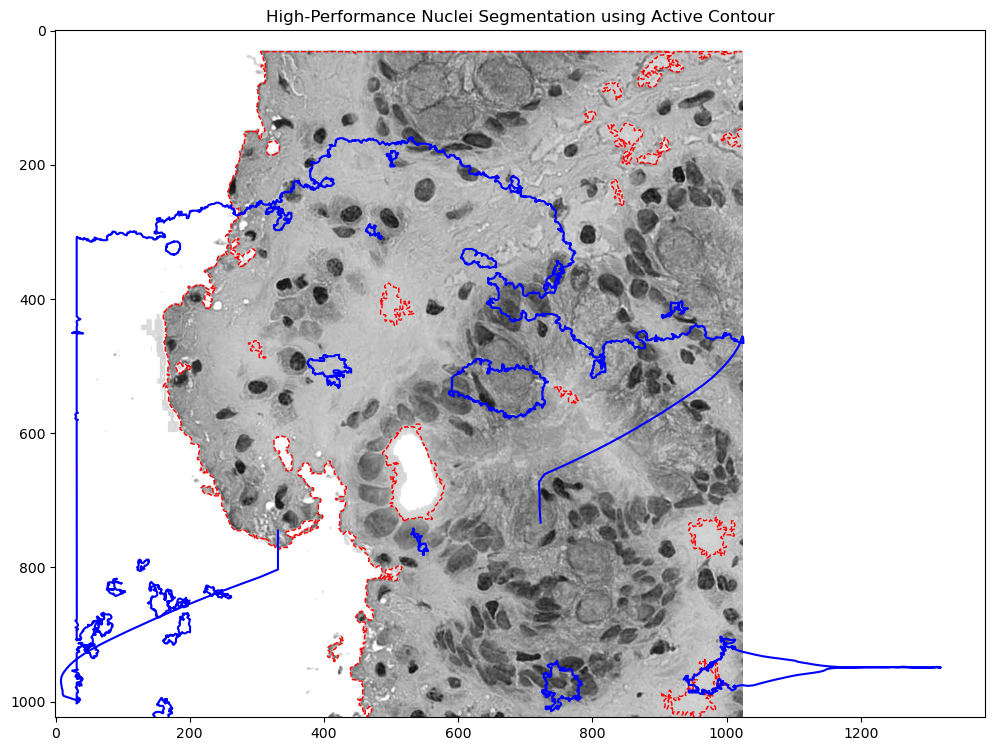

In [11]:
# Convert to grayscale
gray = color.rgb2gray(image)

# Invert grayscale image so that nuclei are bright
inverted_gray = 1 - gray  

# Otsu thresholding to segment nuclei
thresh = threshold_otsu(inverted_gray)
binary_nuclei = inverted_gray > thresh  

# Remove small objects & holes for cleaner segmentation
binary_nuclei = remove_small_objects(binary_nuclei, min_size=150)
binary_nuclei = remove_small_holes(binary_nuclei, area_threshold=150)

# Apply Canny edge detection
edges_canny = canny(binary_nuclei, sigma=1.2)

# Extract and sort contours (keep all detected nuclei)
contours = find_contours(binary_nuclei, 0.5)
contours_sorted = sorted(contours, key=lambda x: len(x), reverse=True)

# Run Active Contour Model on all detected nuclei
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(gray, cmap='gray')

for contour in contours_sorted:
    # Apply Active Contour Model with higher iterations for accuracy
    snake = active_contour(
        edges_canny, contour, alpha=0.01, beta=8, gamma=0.01,
        max_num_iter=300  # Higher iterations for better convergence
    )

    # Plot initial and final contours
    ax.plot(contour[:, 1], contour[:, 0], '--r', lw=1)  # Initial contour (red dashed)
    ax.plot(snake[:, 0], snake[:, 1], '-b', lw=1.5)  # Final contour (blue solid)

ax.set_title("High-Performance Nuclei Segmentation using Active Contour")
plt.show()
